Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering

Lecture des donness

In [16]:
data_frame = None
file_path = '../heart.csv'
if file_path.endswith('.csv'):
    data_frame = pd.read_csv(file_path)
elif file_path.endswith('.arff'):
    raw_data = loadarff(file_path)
    data_frame = pd.DataFrame(raw_data[0])
else:
    print("Format de fichier non pris en charge.")

print(data_frame.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Preprocessing des donnees

In [17]:
attributs = data_frame.columns
print(attributs)
for attribut in data_frame.columns:
    a = data_frame[attribut]
    if a.dtype == "object":
        data_frame.replace('?', a.mode().values[0], inplace=True)
    else:
        data_frame.replace('?', a.mean(), inplace=True)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


Elbow method

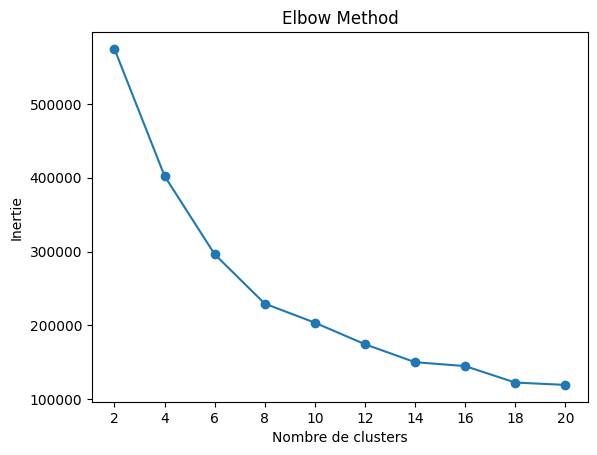

In [18]:
data = data_frame.values
results = {}

for i in range(2, 21, 2):
    model = KMeans(n_clusters=i, n_init="auto").fit(data)
    results[i] = round(model.inertia_, 2)

clusters = list(results.keys())
inertia = list(results.values())
plt.plot(clusters, inertia, marker='o')
plt.xticks(clusters)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Elbow Method')
plt.show()

Algorithm AGNES

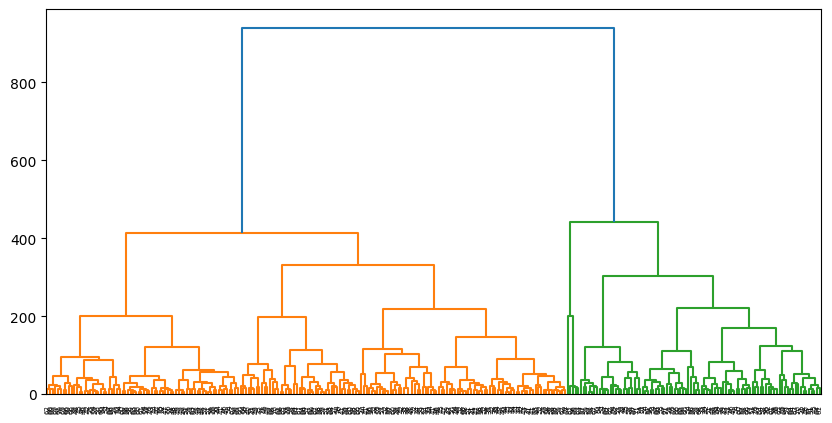

In [19]:
agnes_algo = linkage(data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(agnes_algo, labels=data_frame['age'].tolist())
plt.show()

Diana Algorithm